In [1]:
%matplotlib inline

import matplotlib 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import json

In [3]:
df_review = pd.read_json('review-sample-100k.json', lines = True)

In [4]:
rating = df_review['stars'].value_counts().sort_index()
rating_pct = 100.0*rating/sum(rating)
# list(rating_pct.index)
rating_pct.values

array([ 13.267,   8.309,  11.807,  23.897,  42.72 ])

# Linear regression

In [5]:
# Count number of words for each review
df_review['word_count'] = df_review['text'].apply(lambda x: len(x.split()))
word_by_rating = df_review.groupby(['stars']).agg({'word_count':np.mean})

In [6]:
# Simple linear regression to examine the relationship between star rating and word counts 
import statsmodels.api as sm
x = df_review['stars']
y = df_review['word_count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

/opt/conda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             word_count   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4433.
Date:                Tue, 26 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:03:36   Log-Likelihood:            -6.0473e+05
No. Observations:              100000   AIC:                         1.209e+06
Df Residuals:                   99998   BIC:                         1.209e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.8550      0.915    185.675      0.000     168.062     171.648
stars        -15.2120      0.228    -66.580      0.000     -15.660     -14.764
==============================================================================
Omnibus:                    55242.360   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532432.700
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      13.124   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PLOT 2

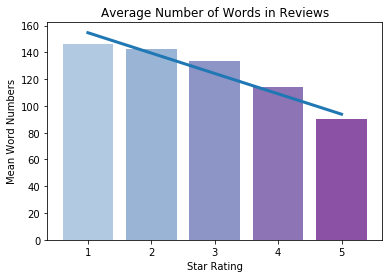

In [8]:
# Now plot!
colors = plt.cm.BuPu(np.linspace(0.3,0.7,len(rating_pct))) # use pretty colorspace
plot2 = plt.bar(word_by_rating.index, word_by_rating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Mean Word Numbers')
plt.title('Average Number of Words in Reviews')

Beta0, Beta1 = model.params
X_plot = np.linspace(1,5,5)
plt.plot(X_plot, X_plot*Beta1 + Beta0, linewidth = 3.0)
#plt.savefig("/Users/liupei-pei/Desktop/Machine_learning/python/TDI_Challenge/fig1.png")


In [8]:
## Aim3: What restaurants have more 3-star ratings?
## 3-star restaurants, duh..

In [9]:
df_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw,56
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw,35
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw,91
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw,67
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw,101


In [10]:
df_restuarant = pd.read_json('business.json', lines = True)

In [11]:
df_restuarant.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{u'AcceptsInsurance': True, u'ByAppointmentOnl...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{u'Tuesday': u'7:30-17:00', u'Friday': u'7:30-...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{u'BusinessParking': {u'garage': False, u'stre...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{u'Monday': u'9:00-20:00', u'Tuesday': u'9:00-...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{u'BusinessAcceptsCreditCards': True, u'Restau...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{u'Alcohol': u'full_bar', u'HasTV': True, u'No...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{u'Monday': u'11:00-1:00', u'Tuesday': u'11:00...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [12]:
df1 = pd.DataFrame({'A':['a1','a2','a3','a4'],'B':['b1','b3','b4','b2'],'C':[12,25,36,40]},index = [1,2,3,4])
df2 = pd.DataFrame({'B':['b1','b2','b3','b4','b5','b6'],'star':[3,4,3.5,2,4,3]}, index = [1,2,3,4,5,6])

In [13]:
print df1
print df2

    A   B   C
1  a1  b1  12
2  a2  b3  25
3  a3  b4  36
4  a4  b2  40
    B  star
1  b1   3.0
2  b2   4.0
3  b3   3.5
4  b4   2.0
5  b5   4.0
6  b6   3.0


In [14]:
pd.merge(df1,df2, on = 'B')

,A,B,C,star
0,a1,b1,12,3.0
1,a2,b3,25,3.5
2,a3,b4,36,2.0
3,a4,b2,40,4.0


In [15]:
df_review = df_review.rename(columns = {"stars": "stars_review"})
df_complete = pd.merge(df_review,df_restuarant, on = 'business_id')

In [16]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
business_id     100000 non-null object
cool            100000 non-null int64
date            100000 non-null datetime64[ns]
funny           100000 non-null int64
review_id       100000 non-null object
stars_review    100000 non-null int64
text            100000 non-null object
useful          100000 non-null int64
user_id         100000 non-null object
word_count      100000 non-null int64
address         100000 non-null object
attributes      100000 non-null object
categories      100000 non-null object
city            100000 non-null object
hours           100000 non-null object
is_open         100000 non-null int64
latitude        99999 non-null float64
longitude       99999 non-null float64
name            100000 non-null object
neighborhood    100000 non-null object
postal_code     100000 non-null object
review_count    100000 non-null int64
stars           100000 non-null

In [17]:
df_complete.stars.unique()

array([ 4. ,  4.5,  3.5,  5. ,  3. ,  1. ,  2.5,  1.5,  2. ])

In [18]:
df_complete.head()

,business_id,cool,date,funny,review_id,stars_review,text,useful,user_id,word_count,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw,56,...,"{u'Monday': u'8:00-0:30', u'Tuesday': u'8:00-0...",1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC
1,0W4lkclzZThpx3V65bVgig,0,2011-09-28,0,FunI9om-aK5oMIIJmhMlZA,4,a must stop when you are in montreal!\n\nI was...,0,u0LXt3Uea_GidxRW1xcsfg,83,...,"{u'Monday': u'8:00-0:30', u'Tuesday': u'8:00-0...",1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC
2,0W4lkclzZThpx3V65bVgig,2,2016-02-22,1,ufI413zxZqGwIBIInnM5Rg,4,*Schwartz's has become a Montreal's famous lan...,4,xYciRtVZ1PW4IxSX4oJ1aw,160,...,"{u'Monday': u'8:00-0:30', u'Tuesday': u'8:00-0...",1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC
3,0W4lkclzZThpx3V65bVgig,0,2013-07-01,0,cDUhgPLuLR8hQDNgkGh_hw,4,"Boss: ""You want to go to a conference in Mont...",0,ayaxadJdy0ObFKaMlgfNVw,105,...,"{u'Monday': u'8:00-0:30', u'Tuesday': u'8:00-0...",1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC
4,0W4lkclzZThpx3V65bVgig,0,2015-12-22,0,gE2sCFSGf8bhZ07uYRjpnw,4,I went to Montreal a few weeks ago Schwartz wa...,0,aU4ba7OlYKOKJ9kpvbOcsg,132,...,"{u'Monday': u'8:00-0:30', u'Tuesday': u'8:00-0...",1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC


In [19]:
x = df_complete.groupby(['stars','stars_review'], as_index = False).count()
x.head(20)

,stars,stars_review,business_id,cool,date,funny,review_id,text,useful,user_id,...,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,state
0,1.0,1,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
1,1.0,2,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2,1.0,3,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1.0,4,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,1.0,5,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,1.5,1,775,775,775,775,775,775,775,775,...,775,775,775,775,775,775,775,775,775,775
6,1.5,2,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
7,1.5,3,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
8,1.5,4,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
9,1.5,5,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


In [20]:
#df_subset = x[["stars", "stars_review", "business_id"]]
#df_subset_gp = df_subset.groupby("stars").agg({"business_id": np.sum}).reset_index()
#df_subset_gp = df_subset_gp.rename(columns = {"business_id": "total_num"})
#df_subset_three_stars = df_subset.loc[df_subset["stars_review"] == 3]
#res = pd.merge(df_subset_three_stars, df_subset_gp, on = ["stars"])
#res["three_stars_pct"] = 100.*res["business_id"].values/res["total_num"].values
#res

In [20]:
from copy import deepcopy
xtemp = deepcopy(x)


In [21]:
i = 0
xtemp['rating_pct']= 2

In [22]:
x["stars_review"].unique()

array([1, 2, 3, 4, 5])

In [23]:
## calculating percetage of each review rating for restaurants of every level

x['rating_pct'] = 5
totall = []
yyy = []
rating_pct = []
for y in x.stars.unique():
    mask = x['stars'] == y
    total = x[mask]['business_id'].sum()
    totall.append(total)   
    yyy.append(y)
    for i in x[mask].index:
        pct = x[mask]['business_id'][i]/float(total)
        rating_pct.append(pct)
        #print x[mask]['business_id'][i]
        #print y
        #print total
        #print x['rating_pct'][i]

print rating_pct


[0.94562647754137119, 0.03309692671394799, 0.0023640661938534278, 0.011820330969267139, 0.0070921985815602835, 0.75024201355275899, 0.087124878993223617, 0.066795740561471445, 0.046466602129719266, 0.049370764762826716, 0.55821773854560741, 0.1319882303488861, 0.11181168558217738, 0.098360655737704916, 0.099621689785624218, 0.37136225673986789, 0.1680057132654883, 0.1535440099982146, 0.15532940546331012, 0.15175861453311909, 0.2268760907504363, 0.14717859220477023, 0.18349538768386936, 0.23826144768553145, 0.20418848167539266, 0.12975115613301036, 0.1083021360933715, 0.16450121118696323, 0.29641048227262717, 0.30103501431402774, 0.070582750582750584, 0.067536907536907539, 0.11232323232323232, 0.29050505050505049, 0.45905205905205904, 0.039164342232595205, 0.029657881254625148, 0.058120339272499572, 0.20299425058348039, 0.67006318665679965, 0.0080539119000657463, 0.0042735042735042739, 0.0054240631163708086, 0.037804076265614731, 0.94444444444444442]


In [24]:
x['rating_pct'] = rating_pct
x['rating_pct']
len(x['rating_pct'])

45

In [25]:
mask2 = x['stars_review'] == 3
x[mask2]['rating_pct']

2     0.002364
7     0.066796
12    0.111812
17    0.153544
22    0.183495
27    0.164501
32    0.112323
37    0.058120
42    0.005424
Name: rating_pct, dtype: float64

In [26]:
# is overall rating related to percentage of 3-star reviews?

In [27]:
import statsmodels.api as sm
x1 = x[mask2]['stars']
y1 = x[mask2]['rating_pct']
x1.index

Int64Index([2, 7, 12, 17, 22, 27, 32, 37, 42], dtype='int64')

In [28]:
# all restaurants are equally likely to get 3-star reviews
x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1).fit()
model.summary()

/opt/conda/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rating_pct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.143
Method:                 Least Squares   F-statistic:                 1.074e-05
Date:                Tue, 26 Jun 2018   Prob (F-statistic):              0.997
Time:                        15:05:22   Log-Likelihood:                 12.148
No. Observations:                   9   AIC:                            -20.30
Df Residuals:                       7   BIC:                            -19.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0956      0.060      1.593      0.155      -0.046       0.237
stars       -6.02e-05      0.018     -0.003      0.997      -0.043       0.043
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.675
Skew:                          -0.174   Prob(JB):                        0.713
Kurtosis:                       1.704   Cond. No.                         8.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Plot 3-star percentage across overall ratings

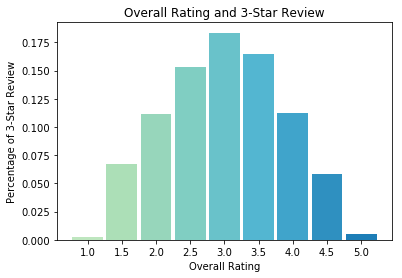

In [30]:
colors = plt.cm.GnBu(np.linspace(0.3,0.8,len(x1))) # use pretty color
plot3 = plt.bar(x[mask2]['stars'].values, x[mask2]['rating_pct'].values, color = colors, width = 0.45)
plt.xlabel('Overall Rating')
plt.ylabel('Percentage of 3-Star Review')
plt.xticks(np.arange(1, 5.5, 0.5))
plt.title('Overall Rating and 3-Star Review')
#plt.savefig("/Users/liupei-pei/Desktop/Machine_learning/python/TDI_Challenge/fig.png")


In [32]:
#??
np.correlate(x[mask2]['stars'], x[mask2]['rating_pct'])

array([ 2.57423625])

In [33]:
from nltk import tokenize
import nltk

In [38]:
import spacy


In [39]:
df_complete['sent_count'] = df_complete['text'].apply(lambda x: len(tokenize.sent_tokenize(x)))

LookupError: 
**********************************************************************
  Resource u'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/home/vagrant/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - u''
**********************************************************************

In [35]:
df_complete.head()

,business_id,cool,date,funny,review_id,stars_review,text,useful,user_id,word_count,...,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,sent_count
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw,56,...,1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC,6
1,0W4lkclzZThpx3V65bVgig,0,2011-09-28,0,FunI9om-aK5oMIIJmhMlZA,4,a must stop when you are in montreal!\n\nI was...,0,u0LXt3Uea_GidxRW1xcsfg,83,...,1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC,7
2,0W4lkclzZThpx3V65bVgig,2,2016-02-22,1,ufI413zxZqGwIBIInnM5Rg,4,*Schwartz's has become a Montreal's famous lan...,4,xYciRtVZ1PW4IxSX4oJ1aw,160,...,1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC,8
3,0W4lkclzZThpx3V65bVgig,0,2013-07-01,0,cDUhgPLuLR8hQDNgkGh_hw,4,"Boss: ""You want to go to a conference in Mont...",0,ayaxadJdy0ObFKaMlgfNVw,105,...,1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC,10
4,0W4lkclzZThpx3V65bVgig,0,2015-12-22,0,gE2sCFSGf8bhZ07uYRjpnw,4,I went to Montreal a few weeks ago Schwartz wa...,0,aU4ba7OlYKOKJ9kpvbOcsg,132,...,1,45.516373,-73.577537,Schwartz's,Plateau-Mont-Royal,H2W 1X9,1953,4.0,QC,8


In [36]:
df_complete['sent_count'].max()

96

In [37]:
sent_by_rating = df_complete.groupby(['stars_review']).agg({'sent_count':np.mean})

In [38]:
sent_by_rating

,sent_count
stars_review,
1,9.726766
2,9.788302
3,9.323029
4,8.346613
5,7.048853


In [39]:
# Testing number of sentence and rating
import statsmodels.api as sm
x3 = df_complete['stars_review']
y3 = df_complete['sent_count']
x3 = sm.add_constant(x3)
model3 = sm.OLS(y3, x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sent_count   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2666.
Date:                Mon, 14 May 2018   Prob (F-statistic):               0.00
Time:                        18:49:02   Log-Likelihood:            -3.2841e+05
No. Observations:              100000   AIC:                         6.568e+05
Df Residuals:                   99998   BIC:                         6.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.9974      0.058    190.550      0.000      10.884      11.111
stars_review    -0.7442      0.014    -51.629      0.000      -0.772      -0.716
==============================================================================
Omnibus:                    55145.206   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           569627.021
Skew:                           2.480   Prob(JB):                         0.00
Kurtosis:                      13.588   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x3.head()

,const,stars_review
0,1.0,5
1,1.0,4
2,1.0,4
3,1.0,4
4,1.0,4


# PLOT4

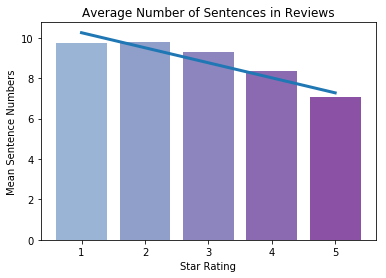

In [41]:
# Plot
colors = plt.cm.BuPu(np.linspace(0.4,0.7,len(sent_by_rating)))
plot4 = plt.bar(sent_by_rating.index, sent_by_rating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Mean Sentence Numbers')
plt.title('Average Number of Sentences in Reviews')

Beta0, Beta1 = model3.params
X_plot = np.linspace(1,5,5)
plt.plot(X_plot, X_plot*Beta1 + Beta0, linewidth = 3.0)
plt.savefig("/Users/liupei-pei/Desktop/Machine_learning/python/TDI_Challenge/fig2.png")

In [54]:
# however, nevertheless, nonetheless, but, still, yet, though, although
df_review['text'] = df_review['text'].apply(lambda x: x.lower())
df_review['text'].head()

0    love the staff, love the meat, love the place....
1    super simple place but amazing nonetheless. it...
2    small unassuming place that changes their menu...
3    lester's is located in a beautiful neighborhoo...
4    love coming here. yes the place always needs t...
Name: text, dtype: object

In [82]:
# Find "but"!
import re
but = []
but_present = []
for i in range(len(df_review['text'])):
    total_but = len(re.findall('but|however',df_review['text'][i]))   
    but.append(total_but)
    if total_but > 0:
        but_present.append(1)
    else:
        but_present.append(0)
df_review['but'] = but 
df_review['but_present'] = but_present

In [56]:
# ANOVA testing number of BUTS across different rating levels
import statsmodels.api as sm
from statsmodels.formula.api import ols

stars_review = df_review['stars_review'].values
but_count = df_review['but'].values

mod = ols('but_count ~ stars_review',
                data = df_review).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                     sum_sq       df            F  PR(>F)
stars_review    5563.162463      1.0  3019.723117     0.0
Residual      184223.883577  99998.0          NaN     NaN


In [57]:
# T-Test
import statsmodels

maskA = df_review['stars_review'] == 3
maskB = df_review['stars_review'] == 5
A = df_review[maskA]['but']
B = df_review[maskB]['but']


statsmodels.stats.weightstats.ttest_ind(A,B,alternative = 'two-sided', usevar = 'pooled')


(87.063484968785431, 0.0, 54525.0)

In [83]:
but_by_rating = df_review.groupby(['stars_review']).agg({'but':np.mean})
but_by_rating

,but
stars_review,
1,0.953946
2,1.484174
3,1.649699
4,1.138762
5,0.567299


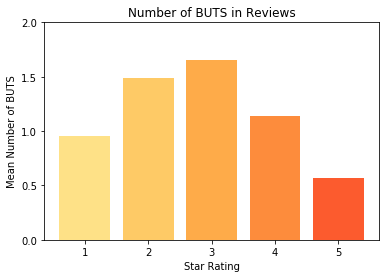

In [84]:
# Plot
colors = plt.cm.YlOrRd(np.linspace(0.2,0.6,len(but_by_rating)))
plot5 = plt.bar(but_by_rating.index, but_by_rating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Mean Number of BUTS')
plt.title('Number of BUTS in Reviews')
plt.yticks(np.arange(0, 2.5, 0.5))
plt.savefig("/Users/liupei-pei/Desktop/Machine_learning/python/TDI_Challenge/fig4.png")

In [61]:
but_present_byrating = df_review.groupby(['stars_review']).agg({'but_present': np.mean})
but_present_byrating

,but_present
stars_review,
1,0.506520
2,0.691539
3,0.740069
4,0.585011
5,0.351756


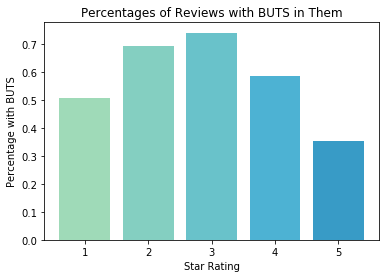

In [107]:
# Plot
colors = plt.cm.GnBu(np.linspace(0.4,0.7,len(but_by_rating)))
plot6 = plt.bar(but_present_byrating.index, but_present_byrating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Percentage with BUTS')
plt.title('Percentages of Reviews with BUTS in Them')

plt.savefig("/Users/liupei-pei/Desktop/Machine_learning/python/TDI_Challenge/fig5.png")

In [67]:
aa = 'hello world i am going to be a data scientist in new york city. Yes that is the plan'
bb = 'I|b|s|a'
re.findall(bb, aa)

['a', 'b', 'a', 'a', 'a', 's', 's', 's', 'a', 's', 'a']

In [108]:
whatever = []
whatever_present = []
whatever_ratio = []
for i in range(len(df_review['text'])):
    total_whatever = len(re.findall("okay",df_review['text'][i]))
    whatever_baselined = total_whatever/float(len(df_review['text'][i]))
    whatever.append(total_whatever)
    whatever_ratio.append(whatever_baselined)
    if total_whatever > 0:
        whatever_present.append(1)
    else:
        whatever_present.append(0)
df_review['whatever'] = whatever 
df_review['whatever_present'] = whatever_present

whatever_by_rating = df_review.groupby(['stars_review']).agg({'whatever':np.mean})
whatever_by_rating

,whatever
stars_review,
1,0.036331
2,0.071729
3,0.075379
4,0.022848
5,0.007420


In [109]:
whatever_present_byrating = df_review.groupby(['stars_review']).agg({'whatever_present': np.mean})
whatever_present_byrating

,whatever_present
stars_review,
1,0.030753
2,0.059935
3,0.063437
4,0.021300
5,0.006835


In [110]:
df_review['whatever_ratio'] = whatever_ratio
whatever_ratio_byrating = df_review.groupby(['stars_review']).agg({'whatever_ratio': np.mean})
whatever_ratio_byrating

,whatever_ratio
stars_review,
1,0.000042
2,0.000107
3,0.000146
4,0.000037
5,0.000010


In [102]:
# 3-star review has the most: okay, not bad, but/however
# 3-star review is most likely to contain the word: like/love
print "don't"

don't
